In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [7]:
df['avg score'] = (df['math score']+df['reading score']+df['writing score'])/3
df['color'] = 'c'
df.loc[df['gender']=='male', 'color'] = 'k'
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score,color
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,c
1,female,group C,some college,standard,completed,69,90,88,82.333333,c
2,female,group B,master's degree,standard,none,90,95,93,92.666667,c
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,k
4,male,group C,some college,standard,none,76,78,75,76.333333,k


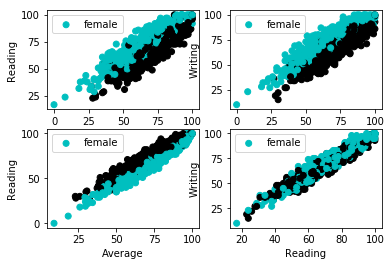

In [8]:
plt.subplot(221)
plt.scatter(df['math score'], df['reading score'], c=df['color'], label='female')
plt.xlabel('Math'), plt.ylabel('Reading')
plt.legend()
plt.subplot(222)
plt.scatter(df['math score'], df['writing score'], c=df['color'], label='female')
plt.xlabel('Math'), plt.ylabel('Writing')
plt.legend()
plt.subplot(223)
plt.scatter(df['avg score'], df['math score'], c=df['color'], label='female')
plt.xlabel('Average'), plt.ylabel('Reading')
plt.legend()
plt.subplot(224)
plt.scatter(df['reading score'], df['writing score'], c=df['color'], label='female')
plt.xlabel('Reading'), plt.ylabel('Writing')
plt.legend()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

X = np.array([df['math score'], df['writing score'], df['avg score']]).T
y = df['gender']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)
kfold = KFold(n_splits=10, random_state=4)
cross_val_score(LogisticRegression(), X_train, y_train, cv=kfold).mean()

0.8787499999999999